In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

column rename

In [6]:
df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# did not update
# df = df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace=True)

In [9]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.describe() # statistical

,CustomerID,Age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df = df.drop('CustomerID', axis=1)

In [12]:
df.describe()

,Age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Visualization

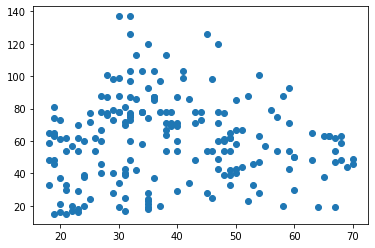

In [13]:
plt.scatter(df['Age'], df.income)

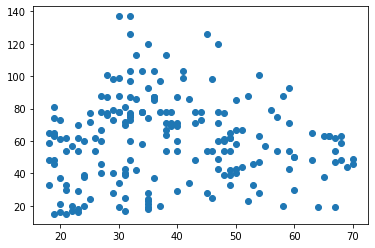

In [14]:
plt.scatter(df.Age, df.income)

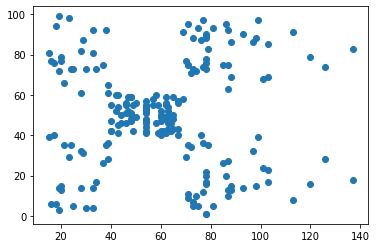

In [15]:
plt.scatter(df['income'], df['score'])

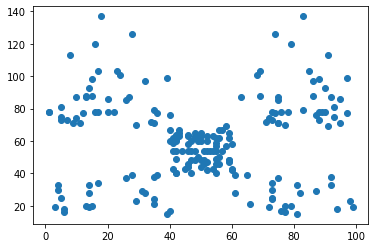

In [16]:
plt.scatter(df['score'], df['income'])

### pairplot

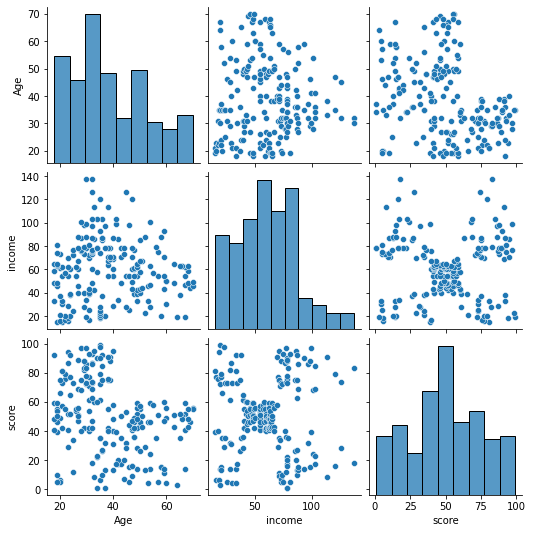

In [17]:
sns.pairplot(df[['Age','income','score']])

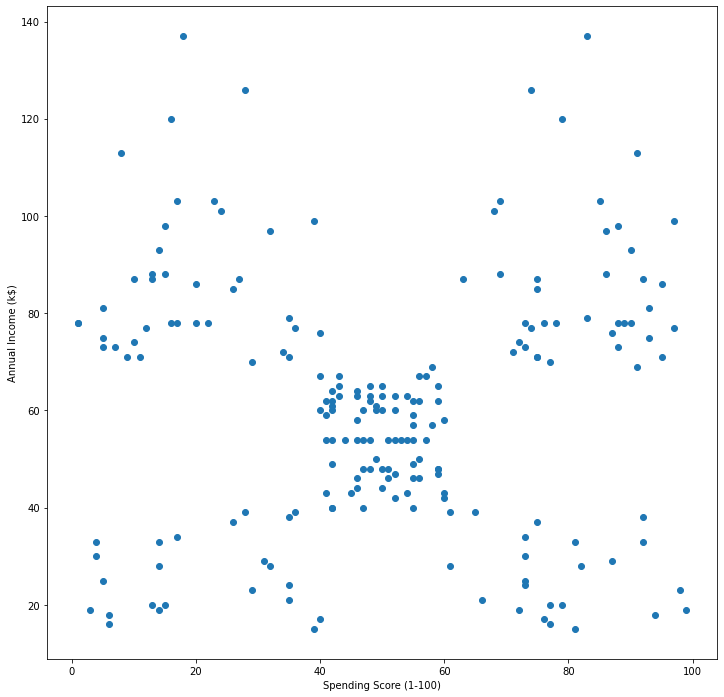

In [18]:
plt.figure(figsize=(12,12))
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.scatter(df.score, df.income)

## KMeans cluster

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans1 = KMeans() # n_clusters=8 default

In [21]:
kmeans1

KMeans()

In [22]:
# predicted = kmeans1.fit_predict([['score', 'income', 'Age']])
predicted = kmeans1.fit_predict(df[['score', 'income']])

In [23]:
predicted

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 7, 6, 7, 6,
       5, 6, 7, 6, 7, 6, 7, 6, 7, 6, 5, 6, 7, 6, 5, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 7, 6, 5, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [24]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [25]:
df['initial_clusters'] = predicted

In [26]:
df.head()

,Gender,Age,income,score,initial_clusters
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


In [27]:
center1 = kmeans1.cluster_centers_

In [28]:
center1

array([[ 19.52380952,  25.14285714],
       [ 51.40909091,  47.29545455],
       [ 82.        , 109.7       ],
       [ 22.        , 109.7       ],
       [ 80.04761905,  25.0952381 ],
       [ 46.1627907 ,  63.72093023],
       [ 82.17241379,  78.55172414],
       [ 12.68181818,  80.18181818]])

In [29]:
kmeans1.predict([[39,15]])

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [30]:
kmeans1.predict([[15,39]])

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [31]:
kmeans1.predict([[56,15]])

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

# 2D Visualization

In [32]:
df0 = df[df.initial_clusters == 0]
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]
df5 = df[df.initial_clusters == 5]
df6 = df[df.initial_clusters == 6]
df7 = df[df.initial_clusters == 7]

In [33]:
df0.shape

(21, 5)

In [34]:
df1.shape

(44, 5)

In [35]:
df7.shape

(22, 5)

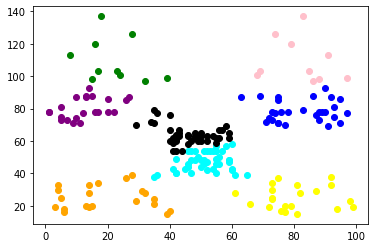

In [36]:
plt.scatter(df0['score'], df0['income'], color='orange',label='Cluster 0')
plt.scatter(df1['score'], df1['income'], color='cyan',label='Cluster 1')
plt.scatter(df2['score'], df2['income'], color='pink',label='Cluster 2')
plt.scatter(df3['score'], df3['income'], color='green',label='Cluster 3')
plt.scatter(df4['score'], df4['income'], color='yellow',label='Cluster 4')
plt.scatter(df5['score'], df5['income'], color='black',label='Cluster 5')
plt.scatter(df6['score'], df6['income'], color='blue',label='Cluster 6')
plt.scatter(df7['score'], df7['income'], color='purple',label='Cluster 7')

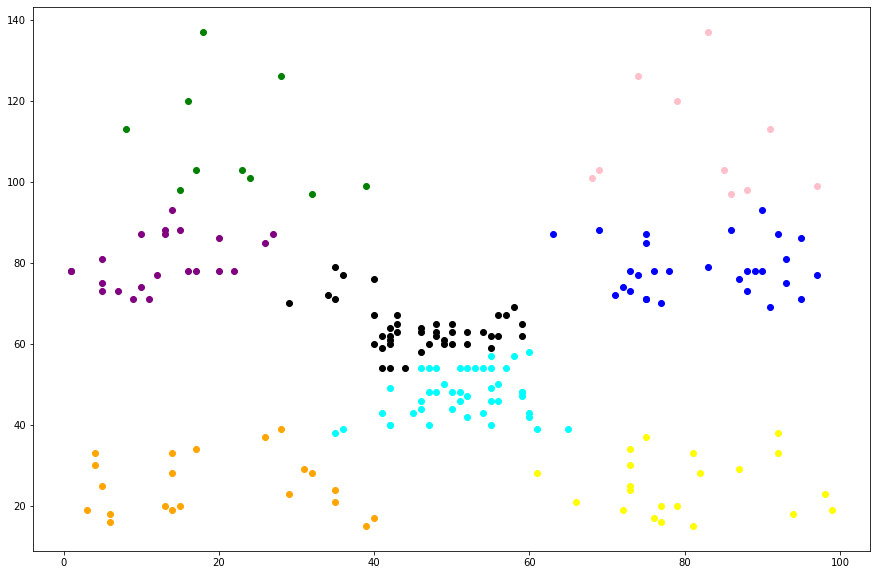

In [37]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'], df0['income'], color='orange',label='Cluster 0')
plt.scatter(df1['score'], df1['income'], color='cyan',label='Cluster 1')
plt.scatter(df2['score'], df2['income'], color='pink',label='Cluster 2')
plt.scatter(df3['score'], df3['income'], color='green',label='Cluster 3')
plt.scatter(df4['score'], df4['income'], color='yellow',label='Cluster 4')
plt.scatter(df5['score'], df5['income'], color='black',label='Cluster 5')
plt.scatter(df6['score'], df6['income'], color='blue',label='Cluster 6')
plt.scatter(df7['score'], df7['income'], color='purple',label='Cluster 7')

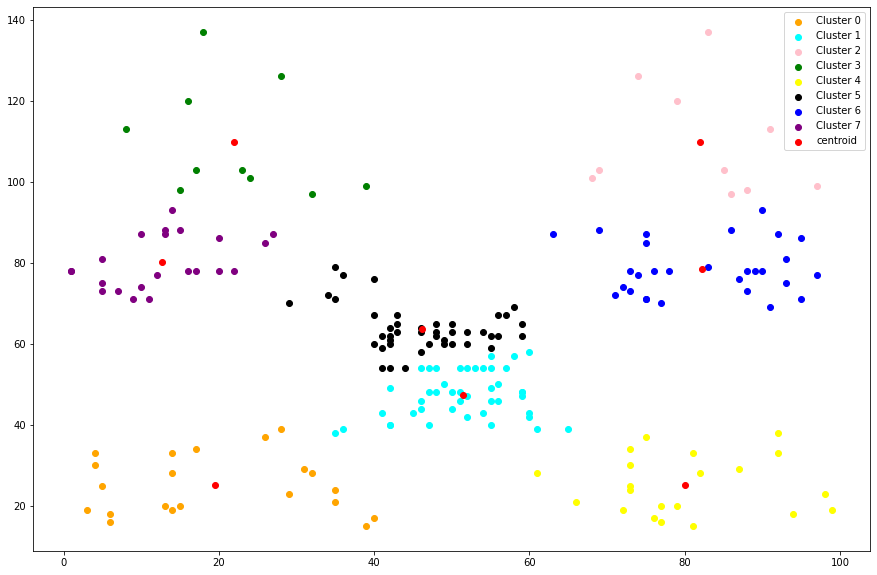

In [38]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'], df0['income'], color='orange',label='Cluster 0')
plt.scatter(df1['score'], df1['income'], color='cyan',label='Cluster 1')
plt.scatter(df2['score'], df2['income'], color='pink',label='Cluster 2')
plt.scatter(df3['score'], df3['income'], color='green',label='Cluster 3')
plt.scatter(df4['score'], df4['income'], color='yellow',label='Cluster 4')
plt.scatter(df5['score'], df5['income'], color='black',label='Cluster 5')
plt.scatter(df6['score'], df6['income'], color='blue',label='Cluster 6')
plt.scatter(df7['score'], df7['income'], color='purple',label='Cluster 7')

#centroids
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')

plt.legend()

# Optimization

In [39]:
#Elbow method
#WCSS - Within Clusters Sum of Squares

In [40]:
wcss = []
cluster = range(1,20)

for k in cluster:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

In [41]:
wcss

[269981.28,
 181363.59595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30227.606513152015,
 25321.07729345123,
 21913.92920119442,
 19649.596582866965,
 17622.546838810125,
 16320.094588744589,
 14313.720574541163,
 13091.262465105574,
 11718.697898415929,
 11198.083472707536,
 9981.646430762221,
 9543.001556106728,
 8606.288852813852]

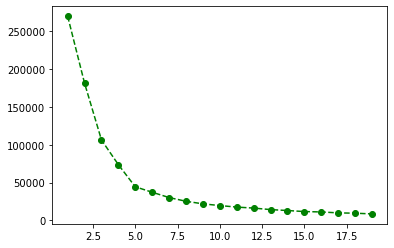

In [42]:
plt.plot(cluster, wcss,'go--')

In [43]:
# !pip install kneed

In [44]:
from kneed import KneeLocator

In [45]:
# pip install --upgrade pip

In [46]:
# python --version


In [47]:
# pip install kneed

In [49]:
kn = KneeLocator(cluster, wcss, curve='convex',direction='decreasing')

In [50]:
kn.knee

5

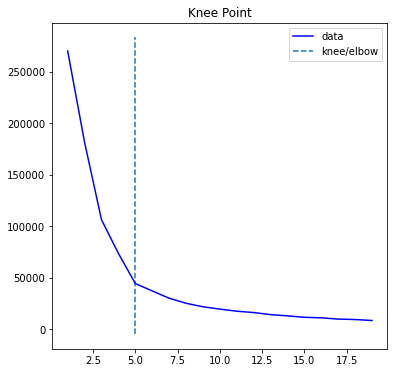

In [51]:
kn.plot_knee()

# After

In [53]:
km3 = KMeans(n_clusters=5)


In [54]:
predicted = km3.fit_predict(df[['score', 'income']]) #fit_predict(df[['income', 'score', 'Age','ho jo bo ro lo']])

In [55]:
df['initial_clusters'] = predicted

In [56]:
center1 = km3.cluster_centers_

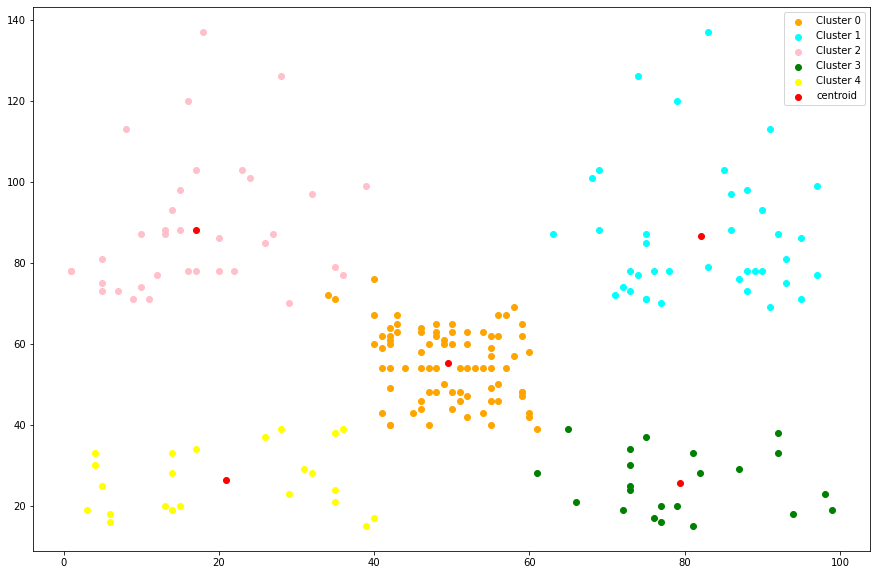

In [57]:
plt.figure(figsize=(15,10))

df0 = df[df.initial_clusters == 0]
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]

plt.scatter(df0['score'], df0['income'], color='orange',label='Cluster 0')
plt.scatter(df1['score'], df1['income'], color='cyan',label='Cluster 1')
plt.scatter(df2['score'], df2['income'], color='pink',label='Cluster 2')
plt.scatter(df3['score'], df3['income'], color='green',label='Cluster 3')
plt.scatter(df4['score'], df4['income'], color='yellow',label='Cluster 4')

#centroids
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')

plt.legend()